In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [95]:
df=pd.read_csv("advertising.csv")
print(df.head())
print(df.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
(200, 4)


In [96]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [97]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


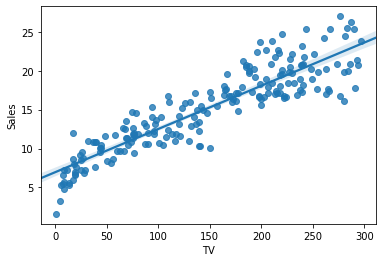

In [98]:
#plotting scatter plot
sns.regplot(x='TV',y='Sales',data=df)

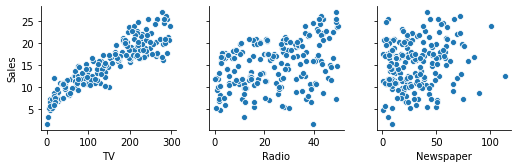

In [99]:
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'], y_vars='Sales')

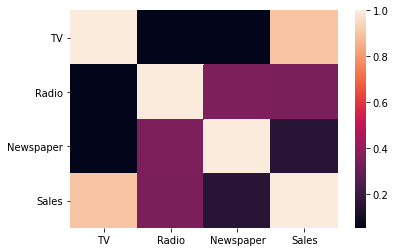

In [100]:
sns.heatmap(df.corr())

In [101]:
X=df['TV']
y=df['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [102]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

C:\Users\Aashish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [103]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [104]:
lr=sm.OLS(y_train,X_train_sm)
#ordinary least square
#creates a linear regression object 
lr_model=lr.fit()
#builds the model
print(lr_model.params)

const    6.948683
TV       0.054546
dtype: float64


this means that the Sales=6.948 + 0.0545 * TV

In [105]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.52e-52
Time:                        20:04:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the summary above we can observe the constants. Then observe P>|t| values for both the coefficients. Here it is 0.00 for both. Low values indicate that there is significant relationship between TV and Sales. If the values had been very high, say 0.5, it would mean that though we have some values for constants, the model is not confident that is is statistically significant.

The next thing we need to observe is R-squared. The value above is 0.816. It means that 81.6% sales is explained by Tv in model. Though correlation doesn't mean causation.

Next we observe Prob (F-statistic). Here its value is 1.52e-52 which is low, very close to 0. It means that the fit is not purely by chance. If the value of Prob( F-statistics) is less than 0.05 we can conclude that fit is significant. Else if it is greater than 0.05 you might need to revisit the model as the fit might be by chance. 

### Visualising the model
Observe realtionship between X and y

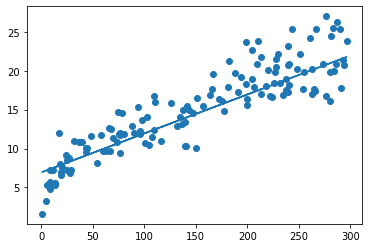

In [106]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948 +0.05*X_train)
plt.show()

### Residual analysis
The fundamental assumptions of linear regression is that error terms are normally distributed.

In [107]:
y_train_pred=lr_model.predict(X_train_sm)

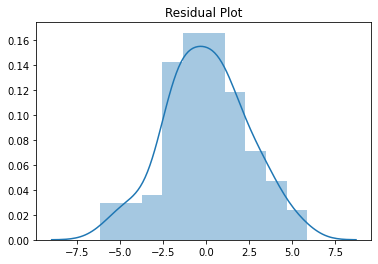

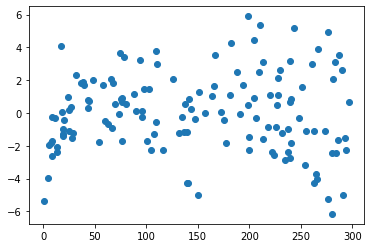

In [108]:
res=y_train-y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()
## loking for patterns in residuals ( ideally we should not be able to see patterns )
plt.scatter(X_train,res)
plt.show()
#equally distributed about zero

### Predictions and evaluations on test set

In [111]:
y_test_pred=lr_model.predict(X_test_sm)
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [114]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
""" anything within 5% between r2 score of training and test set is acceptable and indicates stability.
i.e whatever the model has learnt it has replicated the same on test set """

0.8157933136480389


' anything within 5% between r2 score of training and test set is acceptable and indicates stability.\ni.e whatever the model has learnt it has replicated the same on test set '

Mean Squared Error

In [115]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826956

visualising test set

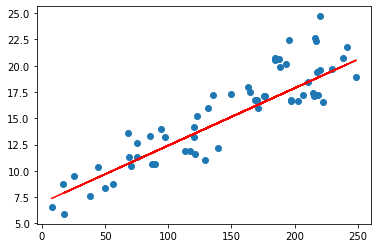

In [122]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r') #red color
plt.show()

# SciKitLearn model
While statsmodels have a lot of benefits like having summary metrics, many times you just want to fit a line throught the data and may not be interested about statistics. In such case we use sklearn.

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=100)

Steps in sklearn
1) create an object of linear regression
2) fit the model
3) see params, make predictions

In [124]:
# create models
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [126]:
# fit the model on X_train and y_train
# the model expects an array but X_train is series
#reshape X_train to (n,1)
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)
# fitting the model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [129]:
# see parameters, make predictions
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [131]:
# Make predictions and evaluate models
y_train_pred=lm.predict(X_train_lm)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8157933136480389
0.7921031601245658
